In [1]:
# import classy module
from classy import Class

In [2]:
%config InlineBackend.figure_format = 'retina'    # Make the plot more clear
import matplotlib.pyplot as plt                   # Import plotting package
from math import pi

In [3]:
# create instance of the class "Class"
LambdaCDM_adiabatic = Class()      # This is pure Adiabatic
LambdaCDM_mixed1 = Class()         # Contains both adiabtic and some CDM isocurvature
LambdaCDM_mixed2 = Class()         # One more object with another set of cosmological parameter

# pass input parameters
LambdaCDM_adiabatic.set({'omega_b':0.02242,'omega_cdm':0.11933,'h':0.67660,'A_s':2.105e-09,'n_s':0.9665,'tau_reio':0.0561})
LambdaCDM_adiabatic.set({'output':'mPk','P_k_max_h/Mpc':10.0, 'z_max_pk': 2.})

# pass input parameters
LambdaCDM_mixed1.set({'omega_b':0.02242,'omega_cdm':0.11933,'h':0.67660,'A_s':2.105e-09,'n_s':0.9665,'tau_reio':0.0561})
LambdaCDM_mixed1.set({'output':'mPk','P_k_max_h/Mpc':10.0, 'z_max_pk': 2.})

# Additional CDM isocurvature perturbation
LambdaCDM_mixed1.set({'ic':'ad,cdi','f_cdi':0.5,'n_cdi':3.75})

# pass input parameters
LambdaCDM_mixed2.set({'omega_b':0.02242,'omega_cdm':0.11933,'h':0.67660,'A_s':2.105e-09,'n_s':0.9665,'tau_reio':0.0561})
LambdaCDM_mixed2.set({'output':'mPk','P_k_max_h/Mpc':10.0, 'z_max_pk': 2.})

# Additional CDM isocurvature perturbation
LambdaCDM_mixed2.set({'ic':'ad,cdi','f_cdi':0.5,'n_cdi':3.})

# omega here is the lower case omega
# 'mPk' means output for matter power spectrum
# 'P_k_max_h/Mpc' is the maximum k you want to output in unit of h/Mpc
# 'z_max_pk' is the maximum redshift that the output data contains
# 'ic' is the mode of isocuvature perturbation; 
# 'ad' means adiabatic perturbation only while 'ad,cdi' consist of both adiabatic and CDM isocurvature perturbation

# run class
# calculate for each set of cosmology
LambdaCDM_adiabatic.compute()
LambdaCDM_mixed1.compute()
LambdaCDM_mixed2.compute()

In [4]:
# get P(k) at redhsift z=2
import numpy as np
kk = np.logspace(-4, 1, 1000) # k in h/Mpc
Pk_1 = []    # An array to store P(k) in (Mpc/h)**3
Pk_2 = []    # An array to store P(k) in (Mpc/h)**3
Pk_3 = []    # An array to store P(k) in (Mpc/h)**3
h = LambdaCDM_adiabatic.h() # get reduced Hubble for conversions to 1/Mpc
for k in kk:
    Pk_1.append(LambdaCDM_adiabatic.pk(k*h,2.)*h**3) # function .pk(k,z)
    Pk_2.append(LambdaCDM_mixed1.pk(k*h,2.)*h**3)    # function .pk(k,z)
    Pk_3.append(LambdaCDM_mixed2.pk(k*h,2.)*h**3)    # function .pk(k,z)
# function .pk returns P(k) at any k and redshift lower than P_k_max_h/Mpc and z_max_pk

Text(0.5, 1.0, '$P(k)$ at $z=2$')

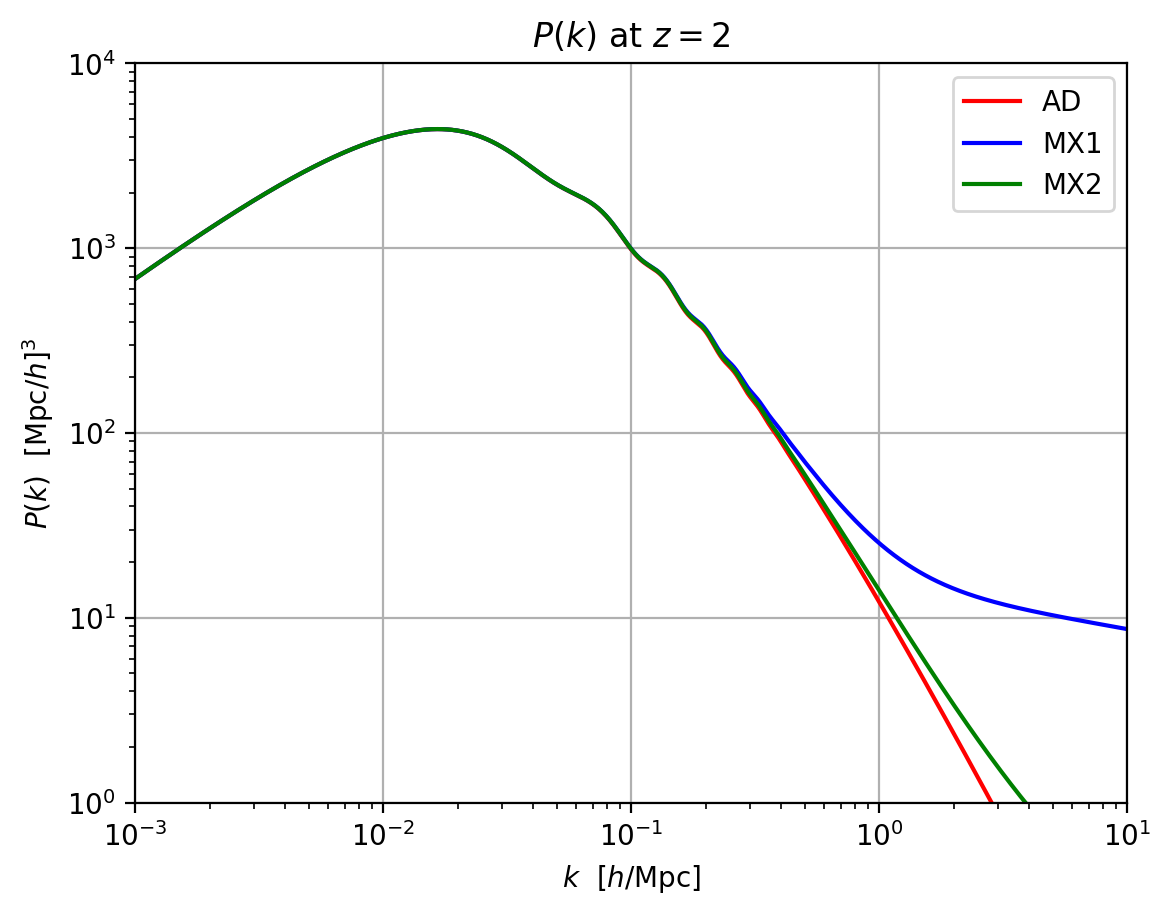

In [5]:
# plot P(k)
plt.xscale('log')    # Set x-axis scale
plt.yscale('log')    # Set y-axis scale
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')         # Set x-axis label
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')    # Set y-axis label
plt.plot(kk,np.array(Pk_1),'r-',label='AD')
plt.plot(kk,np.array(Pk_2),'b-',label='MX1')
plt.plot(kk,np.array(Pk_3),'g-',label='MX2')
plt.xlim(1e-3, 1e1)              # Set x-axis range
plt.ylim(1e0, 1e4)               # Set y-axis range
plt.legend()                     # Show labels of each curves
plt.grid()                       # Add grid
plt.title(r"$P(k)$ at $z=2$")    # Make plot title
# plt.savefig("matterpowerspectrum.pdf")    # Output graph in pdf

In [6]:
# optional: reset parameters to default in case you want 
# to set different parameters and rerun LambdaCDM.compute()
# LambdaCDM.empty()